In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [125]:
df=pd.read_csv("/content/Stock_Price_data_set.csv")

In [126]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [127]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [128]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [129]:
#No null values

In [130]:
df['year']=df['Date'].apply(lambda x: x.split("-")[0])
df

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900,2018
...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500,2022
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300,2022
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000,2022
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022


In [131]:
df.year.unique()

array(['2018', '2019', '2020', '2021', '2022'], dtype=object)

In [132]:
df=df.sort_values(by='year',ascending=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018
145,2018-08-31,370.660004,376.000000,367.079987,367.679993,367.679993,7943400,2018
146,2018-09-04,366.470001,368.880005,361.260010,363.600006,363.600006,7605200,2018
147,2018-09-05,360.000000,363.390015,335.829987,341.179993,341.179993,13092800,2018
148,2018-09-06,347.440002,356.000000,341.989990,346.459991,346.459991,13050200,2018
...,...,...,...,...,...,...,...,...
986,2022-01-04,599.909973,600.409973,581.599976,591.150024,591.150024,4393100,2022
985,2022-01-03,605.609985,609.989990,590.559998,597.369995,597.369995,3067500,2022
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022
995,2022-01-18,520.080017,521.750000,508.679993,510.799988,510.799988,4839100,2022


In [133]:
df.drop(columns=['Date'],inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,year
0,262.000000,267.899994,250.029999,254.259995,254.259995,11896100,2018
145,370.660004,376.000000,367.079987,367.679993,367.679993,7943400,2018
146,366.470001,368.880005,361.260010,363.600006,363.600006,7605200,2018
147,360.000000,363.390015,335.829987,341.179993,341.179993,13092800,2018
148,347.440002,356.000000,341.989990,346.459991,346.459991,13050200,2018
...,...,...,...,...,...,...,...
986,599.909973,600.409973,581.599976,591.150024,591.150024,4393100,2022
985,605.609985,609.989990,590.559998,597.369995,597.369995,3067500,2022
1007,421.440002,429.260010,404.279999,405.600006,405.600006,9905200,2022
995,520.080017,521.750000,508.679993,510.799988,510.799988,4839100,2022


In [134]:
df.corr().Close.sort_values(ascending=False)

<ipython-input-134-5dd90757c2ac>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Close.sort_values(ascending=False)


Close        1.000000
Adj Close    1.000000
High         0.998551
Low          0.998544
Open         0.996812
Volume      -0.413362
Name: Close, dtype: float64

<ipython-input-135-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

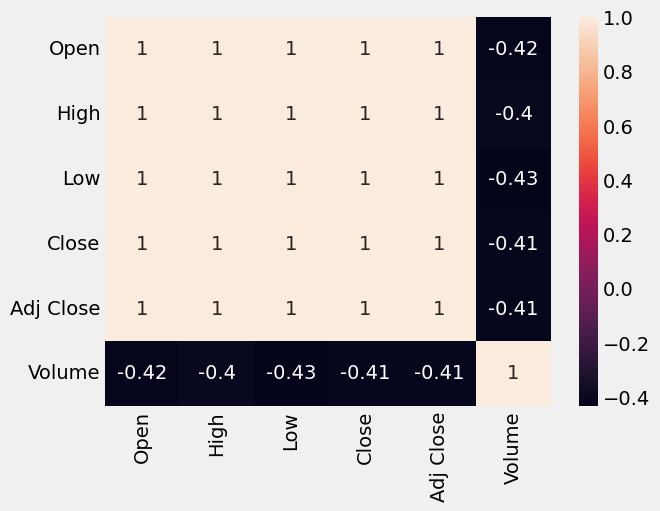

In [135]:
sns.heatmap(df.corr(),annot=True)

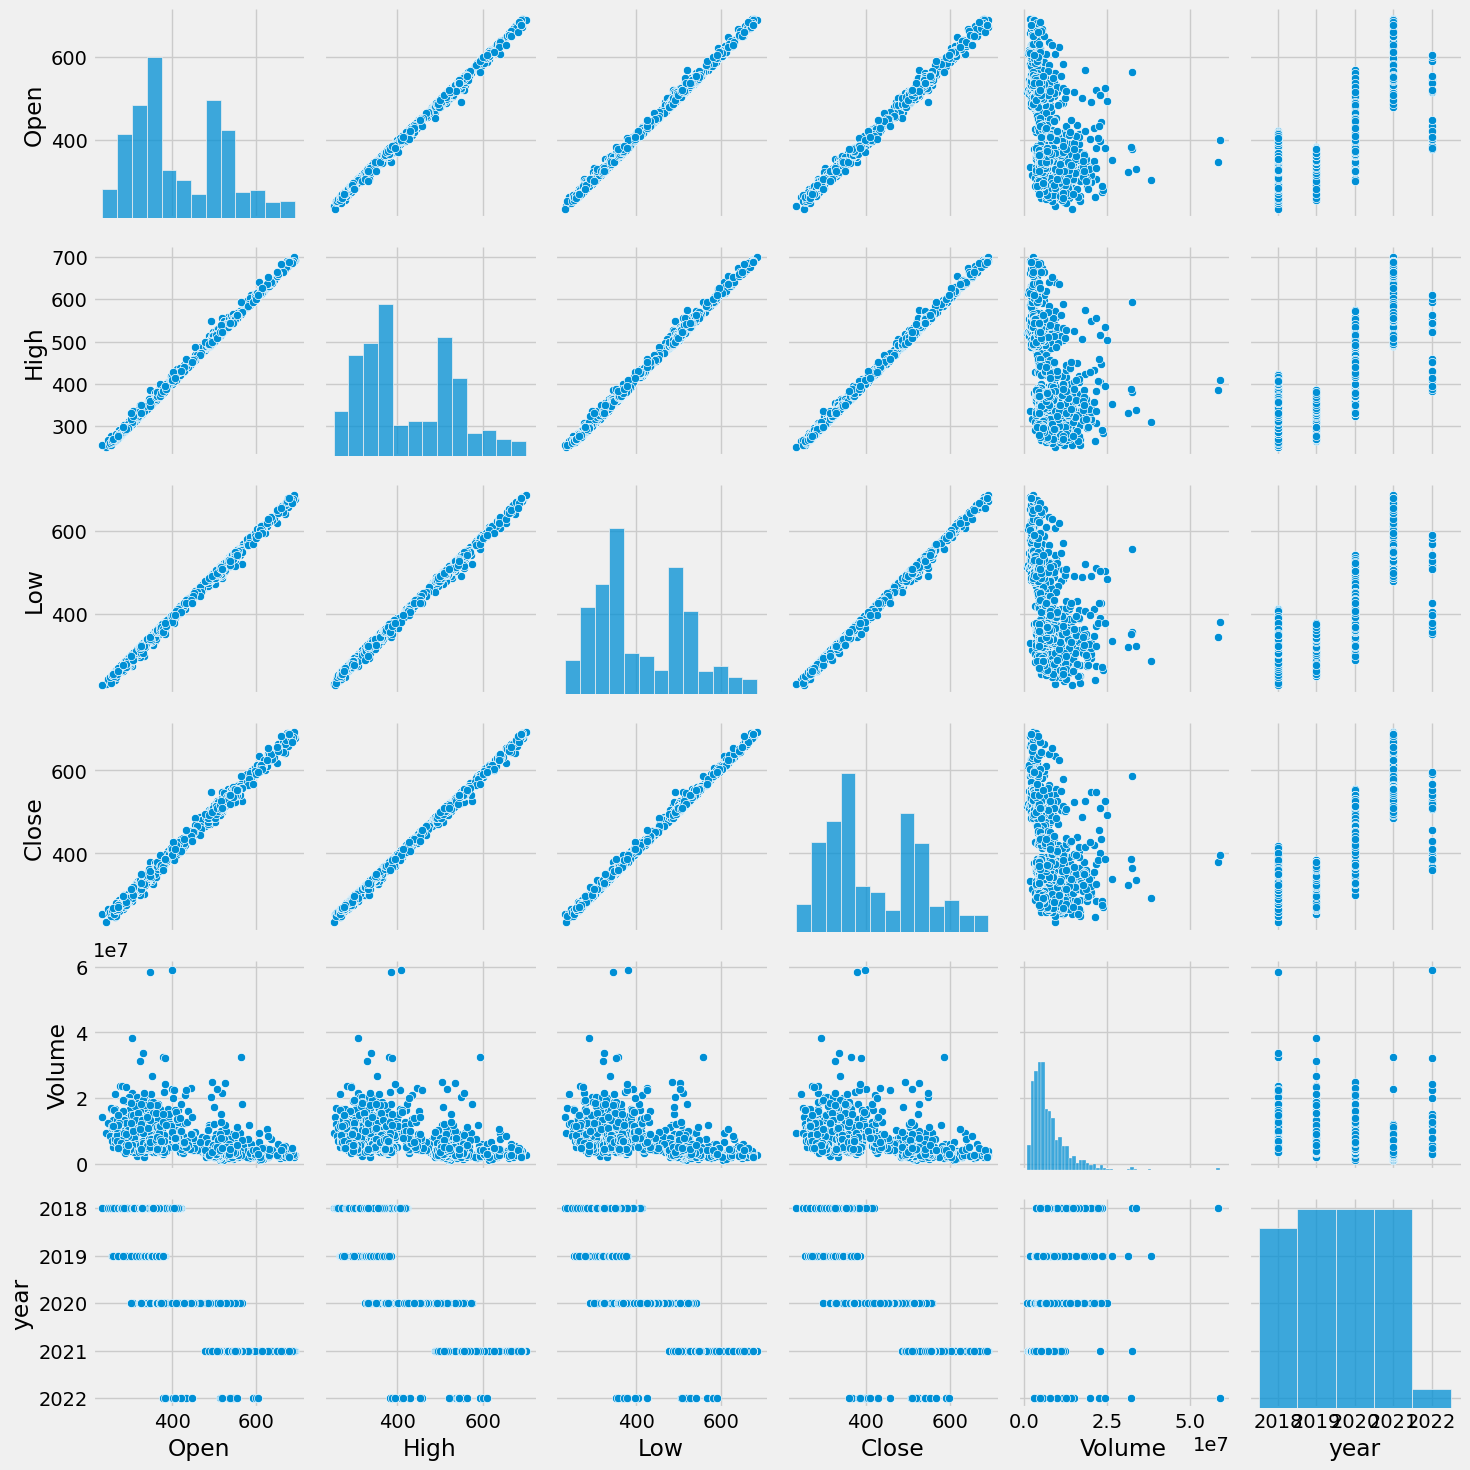

In [136]:
sns.pairplot(df, vars=['Open', 'High', 'Low','Close','Volume','year'])

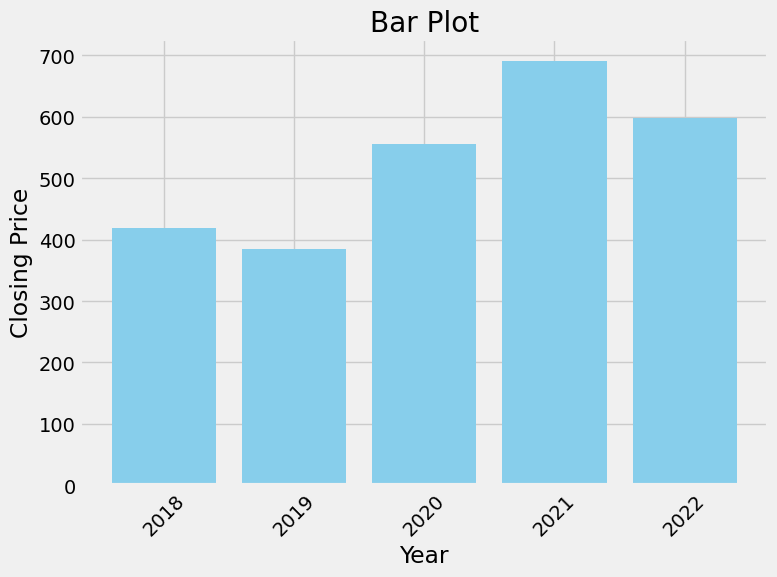

In [137]:
x=df['year']
y=df['Close']
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Bar Plot')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout for better appearance
plt.show()

In [138]:
#During 2021 the closing prices have been high

In [139]:
#Adj Close is redundant
#Volume has the least correlation with respect to 'Close' which is the target variable.
df.drop(columns=["Adj Close","Volume"],inplace=True)

In [140]:
#From the pairplot we can see that 'Open','Close','High' and 'Low' have a linear relaationship with 'Close'

<Axes: >

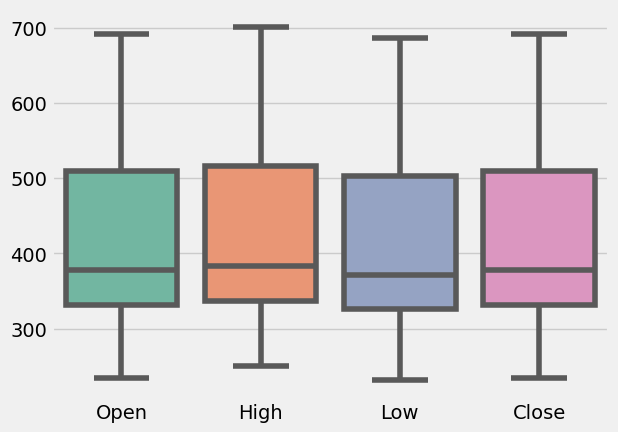

In [141]:
sns.boxplot(data=df, palette="Set2")

In [142]:
#No Outliers

In [143]:
X=df.drop(columns=['year','Close'])

In [144]:
X.head()

,Open,High,Low
0,262.000000,267.899994,250.029999
145,370.660004,376.000000,367.079987
146,366.470001,368.880005,361.260010
147,360.000000,363.390015,335.829987
148,347.440002,356.000000,341.989990


In [145]:
y=df['Close']
y

0       254.259995
145     367.679993
146     363.600006
147     341.179993
148     346.459991
           ...    
986     591.150024
985     597.369995
1007    405.600006
995     510.799988
1008    410.170013
Name: Close, Length: 1009, dtype: float64

In [146]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Linear Regression

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
pred = model.predict(X_test)

In [148]:
# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 418.9469231226815
Coefficients: [-68.98567021  88.44088232  88.72942727]


In [149]:
pred

array([338.1149841 , 358.74218602, 606.85813149, 499.55158953,
       352.50535394, 347.0859074 , 348.98800201, 500.52867647,
       260.19077128, 278.55446945, 607.5954619 , 355.76519997,
       360.19941956, 365.71879551, 290.04754495, 605.30107466,
       574.04505934, 495.34055949, 314.85410773, 309.69301727,
       551.70751135, 537.13435314, 324.25337668, 290.71042936,
       481.98570527, 307.68625227, 371.47822518, 314.24663903,
       372.37481345, 502.80619079, 489.33311495, 649.72127925,
       316.37248098, 295.43214229, 548.68550855, 258.81177912,
       506.99993098, 325.12257834, 291.342586  , 293.32851135,
       484.65108571, 490.91661921, 285.67605266, 498.97303735,
       333.78439602, 307.50408882, 360.52416771, 533.6621445 ,
       662.8398921 , 513.62517347, 356.29519804, 408.20886234,
       260.0414841 , 306.98041392, 517.3580794 , 585.7459163 ,
       364.60079121, 349.32598308, 377.82453772, 357.46613836,
       521.06571466, 350.91541965, 366.77641127, 355.93

In [150]:
y_test

533    332.029999
536    357.320007
904    606.049988
610    507.760010
269    351.040009
          ...    
878    515.150024
430    278.049988
66     329.600006
446    292.010010
223    233.880005
Name: Close, Length: 202, dtype: float64

In [151]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²)
r2 = r2_score(y_test, pred)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 19.34821711096239
Root Mean Squared Error (RMSE): 4.398660831544345
Mean Absolute Error (MAE): 3.077692392302012
R-squared (R²): 0.998239345129734


Ridge Regression

In [152]:
from sklearn.linear_model import Ridge

In [153]:
rid=Ridge()

In [154]:
from sklearn.model_selection import GridSearchCV
para={"alpha":[0.2,0.1, 1, 10, 100]}
ridcv=GridSearchCV(rid,para,scoring="neg_mean_squared_error",cv=5)
ridcv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.2, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [155]:
print(ridcv.best_params_)

{'alpha': 0.1}


In [156]:
print(ridcv.best_score_)

-14.712441307436709


In [157]:
y_pred_rid=ridcv.predict(X_test)

In [158]:
y_pred_rid

array([337.47373659, 359.32168616, 606.68180828, 499.97671982,
       352.87820831, 347.04117295, 348.84336863, 500.03363705,
       260.59693739, 278.04541405, 607.39892252, 355.9475004 ,
       361.4186184 , 365.7243277 , 290.31216264, 604.46972122,
       574.22600447, 495.35161802, 314.90734889, 309.4740281 ,
       551.82415597, 537.1057423 , 324.34420576, 290.92108721,
       481.81702635, 307.84304207, 370.87301836, 314.03906333,
       372.49895626, 502.78963377, 489.85206969, 649.70375448,
       315.93661162, 295.20876768, 548.72594983, 259.13949548,
       507.0032238 , 325.16786678, 291.77194489, 293.1204874 ,
       484.73534002, 491.15193983, 285.56811966, 499.25641008,
       333.80035512, 307.59713655, 360.89661486, 533.95579637,
       663.46007782, 513.33799534, 356.31972985, 407.79399121,
       260.09747259, 306.99086522, 516.76227138, 586.35349611,
       364.32948395, 349.86830361, 377.85838681, 357.9481351 ,
       521.09404398, 350.63224264, 366.86757082, 355.58

In [159]:
y_test

533    332.029999
536    357.320007
904    606.049988
610    507.760010
269    351.040009
          ...    
878    515.150024
430    278.049988
66     329.600006
446    292.010010
223    233.880005
Name: Close, Length: 202, dtype: float64

In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_rid)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_rid)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_rid)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 18.749940740762405
Root Mean Squared Error (RMSE): 4.330120176249431
Mean Absolute Error (MAE): 3.05186211646117
R-squared (R²): 0.9982937872625113


Lasso Regression

In [161]:
from sklearn.linear_model import Lasso
parameters = {"alpha":[0.01,0.2,0.1, 1, 10, 100]}
lasso = Lasso()
grid_search = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'alpha': 0.01}
-15.731744231027445


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.609e+03, tolerance: 7.803e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.514e+03, tolerance: 8.025e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.986e+03, tolerance: 7.489e

In [162]:
y_pred_lasso=grid_search.predict(X_test)

In [163]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred_lasso)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred_lasso)
print("R-squared (R²):", r2)


Mean Squared Error (MSE): 18.401719955012606
Root Mean Squared Error (RMSE): 4.289722596510479
Mean Absolute Error (MAE): 3.0690017605945483
R-squared (R²): 0.9983254747621316


In [164]:
#Compared to Linear Regression Model and Ridge, Lasso has a better R2_score and
#less RMSE and MSE. Hence we can get a good model using the Lasso Regression Model.

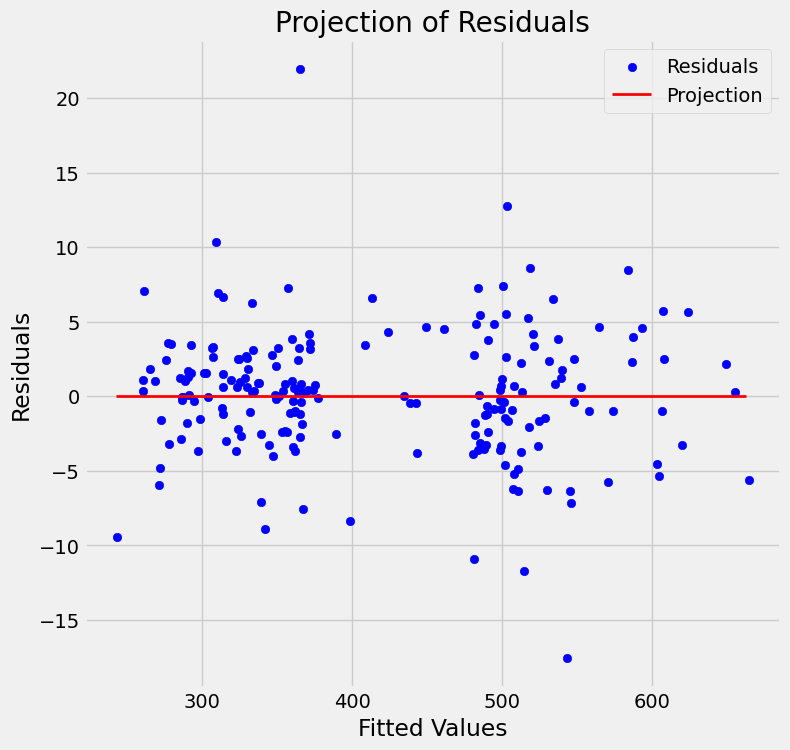

In [165]:
# Predictions and residuals

residuals = y_test - y_pred_lasso

# Projection of residuals
plt.figure(figsize=(8, 8))
plt.scatter(y_pred_lasso.ravel(), residuals.ravel(), color='blue', label='Residuals')
plt.hlines(y=0, xmin=min(pred.ravel()), xmax=max(pred.ravel()), color='red', linewidth=2, label='Projection')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.legend()
plt.title('Projection of Residuals')
plt.show()

In [166]:
# Residual analysis is a technique used to assess a regression model's validity by
# examining the differences between observed values and predicted values by the model.

# Characteristics of Good Residual Plots

# A few characteristics of a good residual plot are as follows:

# 1.It has a high density of points close to the origin and a low density of points
# away from the origin.

# 2.It is symmetric about the origin

# Hence we can say that the model is a good model as we can observe high density of points
# close to the origin.

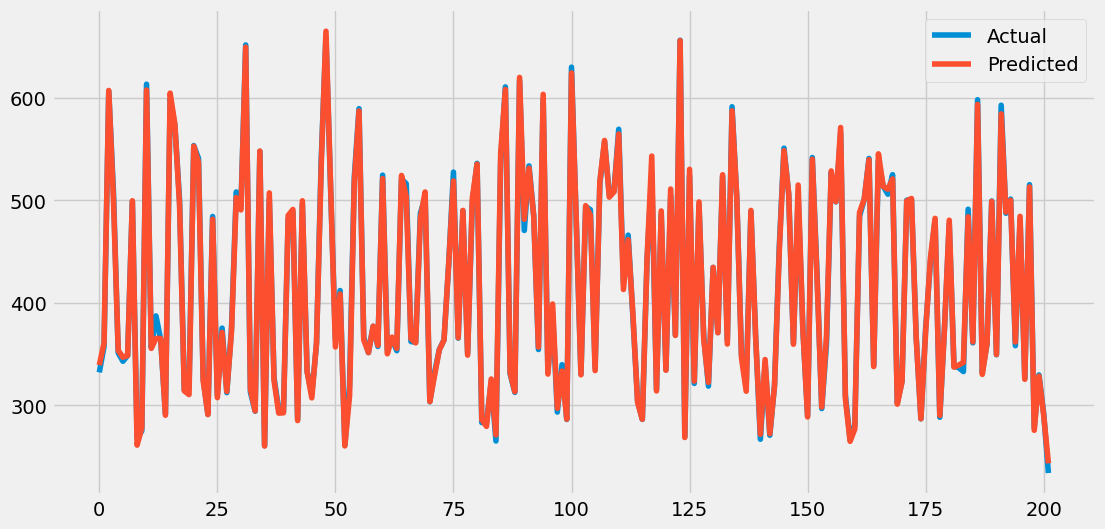

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_lasso, label='Predicted')
plt.legend()
plt.show()

In [168]:
#The predicted and actual output almost overlaps